In [2]:
# Implementation of Classification algorithms of Supervised Learning for Titanic disaster Dataset

# 1.	Importing the libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

In [4]:
%matplotlib inline

# 2.	Import the dataset and explore data

In [5]:
# read data from local machine

df = pd.read_csv('train.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Get the number of rows and columns: df.shape

print(df.shape)

print(df.shape[0])

print(df.shape[1])

row, col = df.shape

print('number of rows', row)


print('number of columns', col)


(891, 12)
891
12
number of rows 891
number of columns 12


In [8]:
print(len(df))

891


In [9]:
# Get the number of elements: df.size,  row_count * column_count

print(df.size)

print(df.shape[0] * df.shape[1])

10692
10692


In [10]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3.	Drop columns that aren’t useful.

In [13]:
df.drop(columns = 'PassengerId', axis = 1, inplace = True)

In [14]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# target = df['Survived']
# df.drop(columns = 'Survived', axis = 1, inplace = True)

In [16]:
# name of Columns
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# number of Columns
print(df.shape[1])

11


# 4.	Explore Numerical features and Categorical features

In [25]:
df['Name'].dtype

dtype('O')

In [26]:
col_dtype = {}

col_dtype2 = []
columns = []


for col in df.columns:
    col_dtype[col] = df[col].dtype
    col_dtype2.append(df[col].dtype)
    columns.append(col)
    
    
col_dtype

{'Survived': dtype('int64'),
 'Pclass': dtype('int64'),
 'Name': dtype('O'),
 'Sex': dtype('O'),
 'Age': dtype('float64'),
 'SibSp': dtype('int64'),
 'Parch': dtype('int64'),
 'Ticket': dtype('O'),
 'Fare': dtype('float64'),
 'Cabin': dtype('O'),
 'Embarked': dtype('O')}

In [27]:
col_dtype2 = []
columns = []

for col in df.columns:
    col_dtype2.append(df[col].dtype)
    columns.append(col)
    

In [28]:
print(col_dtype2)
print(columns)

[dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('O'), dtype('O')]
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [29]:
numerical_feature = []
categorical_feature = []

for col in df.columns:
    if df[col].dtype == 'O':
        categorical_feature.append(col)
    else:
        numerical_feature.append(col)
    

In [30]:
print(numerical_feature)
print(categorical_feature)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [31]:
df_num = df[numerical_feature]
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [32]:
df_cat = df[categorical_feature]
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [33]:
# Get the unique values of 'B' column
df['Ticket'].unique().shape

(681,)

In [34]:
# droping the name and Ticket columns

df.drop(columns = ['Name', 'Ticket'], axis = 1, inplace = True)
df_cat.drop(columns = ['Name', 'Ticket'], axis = 1, inplace = True)

C:\Users\shoja\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
print(df.columns)
print(df_cat.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')
Index(['Sex', 'Cabin', 'Embarked'], dtype='object')


In [36]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [37]:
# deleting  Cabin
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df_cat.drop(columns = 'Cabin', axis = 1, inplace = True)

In [38]:
print(df.columns)
print(df_cat.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Index(['Sex', 'Embarked'], dtype='object')


In [39]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [40]:
df['Embarked'].unique().shape


(4,)

In [41]:
df['Embarked'].unique().shape[0]

4

In [42]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [43]:
df.shape

(891, 8)

In [44]:
df_num_un = {}

for col in df_num:
    df_num_un[col] = df[col].unique().shape[0]
    
df_num_un

{'Survived': 2, 'Pclass': 3, 'Age': 89, 'SibSp': 7, 'Parch': 7, 'Fare': 248}

In [45]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


# 5.	Missing data handling - 
# Imputing or Removing missing values

In [ ]:
# df = df.dropna()
# df = df.dropna(thresh=0.6)
# df = df.dropna(axis=1, how="all")

# mean_value = df.mean()
# mean_imputation = df.fillna(mean_value)

In [47]:
import pandas as pd

# df_num is your original DataFrame
# Loop to get the number of null values for each column
results = []
for col in df_num.columns:
    number_null = df_num[col].isnull().sum()
    results.append([col, number_null])

# Creating a DataFrame from the results
result_df = pd.DataFrame(results, columns=['Feature name', 'Number of Null Values'])

# Display the resulting DataFrame
print(result_df)

  Feature name  Number of Null Values
0     Survived                      0
1       Pclass                      0
2          Age                    177
3        SibSp                      0
4        Parch                      0
5         Fare                      0


In [48]:
import pandas as pd

# df_num is your original DataFrame
# Loop to get the number of null values for each column
results_cat = []

for col in df_cat.columns:
    number_null = df_cat[col].isnull().sum()
    results_cat.append([col, number_null])

# Creating a DataFrame from the results
result_cat_df = pd.DataFrame(results_cat, columns=['Feature name', 'Number of Null Values'])

# Display the resulting DataFrame
print(result_cat_df)

  Feature name  Number of Null Values
0          Sex                      0
1     Embarked                      2


In [49]:
df.shape

(891, 8)

In [50]:
df = df.dropna()

In [51]:
df.shape

(712, 8)

In [52]:
print(df_cat.shape)
print(df_num.shape)

df_cat = df_cat.dropna()
df_num = df_num.dropna()
print()

print(df_cat.shape)
print(df_num.shape)

(891, 2)
(891, 6)

(889, 2)
(714, 6)


In [53]:
numerical_feature = []
categorical_feature = []

for col in df.columns:
    if df[col].dtype == 'O':
        categorical_feature.append(col)
    else:
        numerical_feature.append(col)
    

In [54]:
df_num = df[numerical_feature]
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [55]:
df_cat = df[categorical_feature]
df_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [56]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [57]:
df2 = df.drop('Survived', axis= 1)
df2.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [58]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [59]:
df.shape

(712, 8)

# 7.	Data discretization –
# if necessary converting continuous data into categorical or ordinal

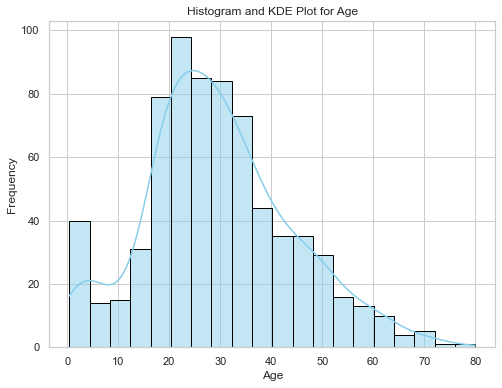

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_num is your DataFrame
sns.set(style="whitegrid")  # Set the style for Seaborn

# Choose the number of bins and adjust the figure size as needed
plt.figure(figsize=(8, 6))

# Plot the histogram with a kernel density estimate
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Set labels and title
plt.title('Histogram and KDE Plot for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [62]:
print(df['Age'].min())
print(df['Age'].max())

0.42
80.0


In [63]:
# column 'Age', which is continouse. so we converte this continuous data into categorical data (5 group)

# Adjust the bin edges based on your data distribution
bins = [0, 10, 20, 35, 50, 81]  # You can customize these bin edges

# Create labels for the bins
labels = ['0-10', '11-20', '21-35', '36-50', '51-81']

# Use the "cut()" function to convert 'Age' into categorical data
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows of the updated DataFrame
print(df['Age_Category'].head())
print(df.head())

0    21-35
1    36-50
2    21-35
3    21-35
4    21-35
Name: Age_Category, dtype: category
Categories (5, object): ['0-10' < '11-20' < '21-35' < '36-50' < '51-81']
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Age_Category
0         0       3    male  22.0      1      0   7.2500        S        21-35
1         1       1  female  38.0      1      0  71.2833        C        36-50
2         1       3  female  26.0      0      0   7.9250        S        21-35
3         1       1  female  35.0      1      0  53.1000        S        21-35
4         0       3    male  35.0      0      0   8.0500        S        21-35


In [64]:
df.drop(columns = 'Age', axis= 1, inplace = True)
print(df.head())

   Survived  Pclass     Sex  SibSp  Parch     Fare Embarked Age_Category
0         0       3    male      1      0   7.2500        S        21-35
1         1       1  female      1      0  71.2833        C        36-50
2         1       3  female      0      0   7.9250        S        21-35
3         1       1  female      1      0  53.1000        S        21-35
4         0       3    male      0      0   8.0500        S        21-35


In [65]:
df['Age_Category'] = df['Age_Category'].replace({
    '0-10': 0,
    '11-20': 1,
    '21-35': 2,
    '36-50': 3,
    '51-81': 4,
})


In [66]:
df['Age'] = df['Age_Category']

In [67]:
print(df.head())

   Survived  Pclass     Sex  SibSp  Parch     Fare Embarked  Age_Category  Age
0         0       3    male      1      0   7.2500        S             2    2
1         1       1  female      1      0  71.2833        C             3    3
2         1       3  female      0      0   7.9250        S             2    2
3         1       1  female      1      0  53.1000        S             2    2
4         0       3    male      0      0   8.0500        S             2    2


In [68]:
df.drop(columns = 'Age_Category', axis= 1, inplace = True)
print(df.head())

   Survived  Pclass     Sex  SibSp  Parch     Fare Embarked  Age
0         0       3    male      1      0   7.2500        S    2
1         1       1  female      1      0  71.2833        C    3
2         1       3  female      0      0   7.9250        S    2
3         1       1  female      1      0  53.1000        S    2
4         0       3    male      0      0   8.0500        S    2


# 8.	Data Transformation - 
# Converting data into a different representation (e.g. Log Transformation)

In [69]:
# Apply 'log transformation' to skewed features
df['Fare'] = np.log1p(df['Fare'])

print(df['Fare'])

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
885    3.405355
886    2.639057
887    3.433987
889    3.433987
890    2.169054
Name: Fare, Length: 712, dtype: float64


In [70]:
print(df.head())

   Survived  Pclass     Sex  SibSp  Parch      Fare Embarked  Age
0         0       3    male      1      0  2.110213        S    2
1         1       1  female      1      0  4.280593        C    3
2         1       3  female      0      0  2.188856        S    2
3         1       1  female      1      0  3.990834        S    2
4         0       3    male      0      0  2.202765        S    2


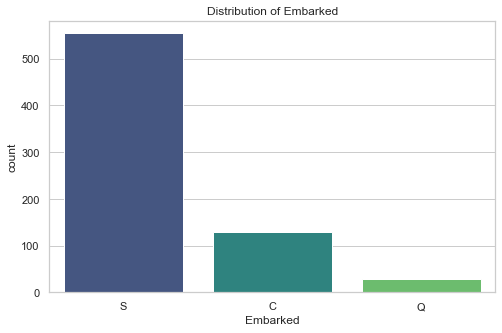

In [71]:
# Plotting 'Embarked' distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=df, palette='viridis')
plt.title("Distribution of Embarked")
plt.show()

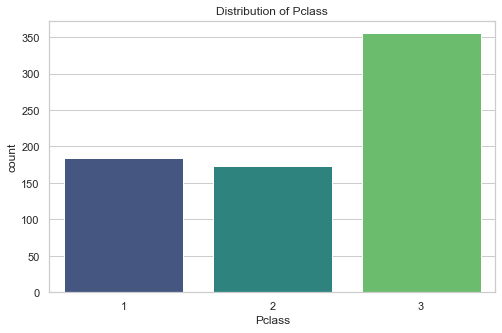

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title("Distribution of Pclass")
plt.show()

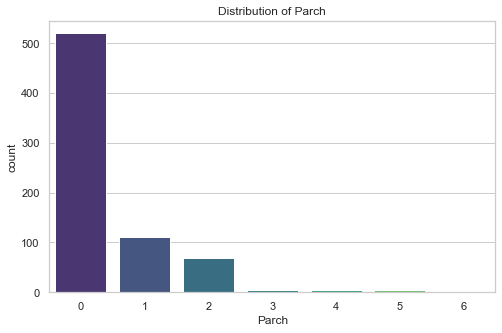

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Parch', data=df, palette='viridis')
plt.title("Distribution of Parch")
plt.show()

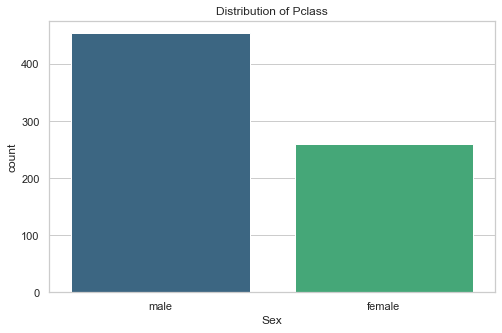

In [74]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title("Distribution of Pclass")
plt.show()

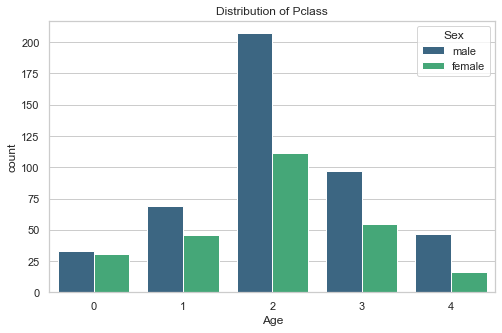

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age', data=df, hue = 'Sex',palette='viridis')
plt.title("Distribution of Pclass")
plt.show()

In [76]:
print(df.head())

   Survived  Pclass     Sex  SibSp  Parch      Fare Embarked  Age
0         0       3    male      1      0  2.110213        S    2
1         1       1  female      1      0  4.280593        C    3
2         1       3  female      0      0  2.188856        S    2
3         1       1  female      1      0  3.990834        S    2
4         0       3    male      0      0  2.202765        S    2


# 9.	Encoding categorical variables - 
# converting categorical variables into numerical format for use in modeling (get-dummies).

In [77]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Implementing Label Encoding on all features with a for loop

df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


In [78]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [79]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,1,1,0,2.110213,2,2
1,1,1,0,1,0,4.280593,0,3
2,1,3,0,0,0,2.188856,2,2
3,1,1,0,1,0,3.990834,2,2
4,0,3,1,0,0,2.202765,2,2


# 10.	Data split – 
# Splitting the dataset into training, validation, and test sets 

In [80]:
target = df['Survived']
df.drop(columns = 'Survived', axis = 1, inplace = True)
print(target.head())
print(df.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass  Sex  SibSp  Parch      Fare  Embarked  Age
0       3    1      1      0  2.110213         2    2
1       1    0      1      0  4.280593         0    3
2       3    0      0      0  2.188856         2    2
3       1    0      1      0  3.990834         2    2
4       3    1      0      0  2.202765         2    2


In [90]:
X_train = df
Y_train = target

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

In [92]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,1,1,0,2.110213,2,2
1,1,0,1,0,4.280593,0,3
2,3,0,0,0,2.188856,2,2
3,1,0,1,0,3.990834,2,2
4,3,1,0,0,2.202765,2,2


In [93]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# 11. Modeling 

In [ ]:
# x_train
# x_test
# y_train
# y_test

### Logistic Regression 

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        80
           1       0.86      0.68      0.76        63

    accuracy                           0.81       143
   macro avg       0.82      0.80      0.80       143
weighted avg       0.82      0.81      0.81       143



### Logistic Regression with CV

In [95]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load the dataset 
# x_train
# x_test
# y_train
# y_test

# Initialize the Logistic Regression model
model = LogisticRegression()

# Define the cross-validation strategy (Stratified K-Folds)
cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, x_train, y_train, cv = cross_val, scoring = 'accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.83333333 0.78070175 0.83333333 0.76315789 0.86725664]
Mean Accuracy: 0.8155565905915232


In [ ]:
# Implementing different algorithm

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  

# model objects
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 6, random_state=0)
lr_model = LogisticRegression(max_iter=10000)
gb_model = GradientBoostingClassifier()
nb_model = GaussianNB()
svc_model = SVC()

In [96]:
# validation model training

rf_model.fit(x_train, y_train.ravel())
lr_model.fit(x_train, y_train.ravel())
gb_model.fit(x_train, y_train.ravel())
nb_model.fit(x_train, y_train.ravel())
svc_model.fit(x_train, y_train.ravel())


# predict and get score

rf_predict = rf_model.predict(x_test)

lr_predict = lr_model.predict(x_test)

gb_predict = gb_model.predict(x_test)

nb_predict = nb_model.predict(x_test)

svc_predict = svc_model.predict(x_test)

print("Accuracy Scores after splitting the dataset for training and testing:")

print("Random forest {:0.2f}%".format(accuracy_score(y_test, rf_predict)*100))
print()
print("Logistic Regression {:0.2f}%".format(accuracy_score(y_test, lr_predict)*100))
print()
print("Gradient Boost {:0.2f}%".format(accuracy_score(y_test, gb_predict)*100))
print()
print("Naive Bayes {:0.2f}%".format(accuracy_score(y_test, nb_predict)*100))
print()
print("Support Vector Classifier {:0.2f}%".format(accuracy_score(y_test, svc_predict)*100))

Accuracy Scores after splitting the dataset for training and testing:
Random forest 78.32%

Logistic Regression 81.12%

Gradient Boost 80.42%

Naive Bayes 72.73%

Support Vector Classifier 81.82%


In [ ]:
# The result shows that Support Vector Classifier (SVC) perform better than other classification Algorithm

<!-- 
# The result you provided is an evaluation of different machine learning models on the Titanic dataset using various classification algorithms. Each accuracy score represents the performance of a specific algorithm in predicting whether a passenger survived or not based on the features available in the dataset.

# Here's a brief interpretation of the results:

# Random Forest (78.32%): Random Forest is an ensemble learning method that builds multiple decision trees and merges them together. It achieved an accuracy of 78.32%, indicating that it correctly predicted the survival status for approximately 78.32% of the passengers in the test set.

# Logistic Regression (81.12%): Logistic Regression is a linear model used for binary classification problems. It achieved an accuracy of 81.12%, suggesting that it performed slightly better than the Random Forest model in this case.

# Gradient Boost (80.42%): Gradient Boosting is another ensemble technique that builds trees sequentially, with each tree correcting the errors of the previous one. It achieved an accuracy of 80.42%, showing good predictive performance.

# Naive Bayes (72.73%): Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It achieved an accuracy of 72.73%, which is lower than the other models. Naive Bayes may not perform as well when the independence assumption between features is violated.

# Support Vector Classifier (81.82%): Support Vector Classifier (SVC) is a supervised learning algorithm that separates classes by finding the hyperplane that maximally separates the data. It achieved the highest accuracy among the models you tested, with 81.82%.

# In summary, based on accuracy alone, the Support Vector Classifier performed the best in your analysis, followed closely by Logistic Regression and Gradient Boosting. It's essential to note that accuracy is just one metric, and depending on the nature of your problem, you may want to consider other metrics such as precision, recall, or F1-score to get a more comprehensive evaluation of your models. Additionally, it's a good practice to perform cross-validation to ensure the robustness of your results. -->

# SVM Hyperparameter Tuning

In [ ]:
# X_train = df
# Y_train = target

In [ ]:
# x_train 
# y_train
# x_test
# y_test

In [97]:
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
# Apply kernels to transform the data to a higher dimension

In [102]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear'] #A function which returns the corresponding SVC model

def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [106]:
# Trian model
# Calling the SVC() model from sklearn and fit the model to the training data

result_dict = {}

for i in range(4):
    # Split the data into test and training sets
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.20)
    # initializing the above created 'getClassifier()' function
    svclassifier = getClassifier(i) 
    # Train a SVC model using different kernal
    svclassifier.fit(x_train, y_train)
    # Make prediction
    y_pred = svclassifier.predict(x_test)# Evaluate our model
    # Evaluate models
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))
    result_dict[kernels[i]] = accuracy_score(y_test, y_pred)*100
    

sorted_result_dict = sorted(result_dict.items(), key=lambda x:x[1])
print(sorted_result_dict)


Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        89
           1       0.70      0.65      0.67        54

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.74       143
weighted avg       0.76      0.76      0.76       143

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        80
           1       0.87      0.65      0.75        63

    accuracy                           0.80       143
   macro avg       0.82      0.79      0.79       143
weighted avg       0.82      0.80      0.80       143

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        82
           1       1.00      0.02      0.03        61

    accuracy                           0.58       143
   macro avg       0.79      0.51      0.38     

In [ ]:
# The result shows that RBF perform better than others

# Tuning the hyper-parameters of an estimator using GridSearchCV

In [107]:
# Split the data into test and training sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.20, random_state = 42)

In [110]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'linear']}

# Initialize the model
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [111]:
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.763 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.798 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.798 total time=   0.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.798 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.814 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.798 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.728 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.772 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.805 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.754 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.805 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.614 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.596 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.614 total time=   0.0s
[CV 4/5] END ......C=1, gamm

[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.605 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.605 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.602 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.798 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.728 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.772 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.805 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.781 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.781 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 5/5] END ........C=100, 

[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.754 total time=   1.7s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.772 total time=   2.6s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.763 total time=   1.8s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.763 total time=   2.7s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.779 total time=   2.3s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.798 total time=   5.1s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.728 total time=  20.3s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.833 total time=  10.1s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.772 total time=  23.4s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.805 total time=  23.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.754 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.816 total time=   0.0s
[CV 3/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [112]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(C=1, gamma=0.1)


In [113]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [114]:
# predict test data based on best_estimator model
grid_predictions = grid.predict(x_test)

In [115]:
# print classification report 
print(confusion_matrix(y_test, grid_predictions))


[[71  9]
 [17 46]]


In [116]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        80
           1       0.84      0.73      0.78        63

    accuracy                           0.82       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



# Applying trained model on test data of kaggle.com

In [142]:
# read Test data from local machine
df_test = pd.read_csv('test.csv')

### preprocessing test data

In [144]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [145]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [146]:
Passenger_Id = df_test.PassengerId
Passenger_Id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [147]:
df_test.drop(columns = 'PassengerId', axis = 1, inplace = True)

In [148]:
df_test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [149]:
numerical_feature = []
categorical_feature = []

for col in df_test.columns:
    if df_test[col].dtype == 'O':
        categorical_feature.append(col)
    else:
        numerical_feature.append(col)

In [150]:
print(numerical_feature)
print(categorical_feature)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [151]:
# droping the name and Ticket columns

df_test.drop(columns = ['Name', 'Ticket'], axis = 1, inplace = True)

In [153]:
df_test.drop(columns = ['Cabin'], axis = 1, inplace = True)

In [154]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [155]:
import pandas as pd

# df_num is your original DataFrame
# Loop to get the number of null values for each column
results_cat = []

for col in df_test.columns:
    number_null = df_test[col].isnull().sum()
    results_cat.append([col, number_null])

# Creating a DataFrame from the results
result_cat_df = pd.DataFrame(results_cat, columns=['Feature name', 'Number of Null Values'])

# Display the resulting DataFrame
print(result_cat_df)

  Feature name  Number of Null Values
0       Pclass                      0
1          Sex                      0
2          Age                     86
3        SibSp                      0
4        Parch                      0
5         Fare                      1
6     Embarked                      0


In [ ]:
# since this is test data in kaggle.com , so we can not delete any rows. therefore we impute the null values

In [156]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_test['Fare'] = imputer.fit_transform(df_test[['Fare']])

df_test['Age'] = imputer.fit_transform(df_test[['Age']])


In [157]:
import pandas as pd

# df_num is your original DataFrame
# Loop to get the number of null values for each column
results_cat = []

for col in df_test.columns:
    number_null = df_test[col].isnull().sum()
    results_cat.append([col, number_null])

# Creating a DataFrame from the results
result_cat_df = pd.DataFrame(results_cat, columns=['Feature name', 'Number of Null Values'])

# Display the resulting DataFrame
print(result_cat_df)

  Feature name  Number of Null Values
0       Pclass                      0
1          Sex                      0
2          Age                      0
3        SibSp                      0
4        Parch                      0
5         Fare                      0
6     Embarked                      0


In [158]:
# column 'Age', which is continouse. so we converte this continuous data into categorical data (5 group)

# Adjust the bin edges based on your data distribution
bins = [0, 10, 20, 35, 50, 81]  # You can customize these bin edges

# Create labels for the bins
labels = ['0-10', '11-20', '21-35', '36-50', '51-81']

# Use the "cut()" function to convert 'Age' into categorical data
df_test['Age_Category'] = pd.cut(df_test['Age'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows of the updated DataFrame
print(df_test['Age_Category'].head())
print(df_test.head())

0    21-35
1    36-50
2    51-81
3    21-35
4    21-35
Name: Age_Category, dtype: category
Categories (5, object): ['0-10' < '11-20' < '21-35' < '36-50' < '51-81']
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked Age_Category
0       3    male  34.5      0      0   7.8292        Q        21-35
1       3  female  47.0      1      0   7.0000        S        36-50
2       2    male  62.0      0      0   9.6875        Q        51-81
3       3    male  27.0      0      0   8.6625        S        21-35
4       3  female  22.0      1      1  12.2875        S        21-35


In [159]:
df_test.drop(columns = 'Age', axis= 1, inplace = True)
print(df_test.head())

   Pclass     Sex  SibSp  Parch     Fare Embarked Age_Category
0       3    male      0      0   7.8292        Q        21-35
1       3  female      1      0   7.0000        S        36-50
2       2    male      0      0   9.6875        Q        51-81
3       3    male      0      0   8.6625        S        21-35
4       3  female      1      1  12.2875        S        21-35


In [160]:
df_test['Age_Category'] = df_test['Age_Category'].replace({
    '0-10': 0,
    '11-20': 1,
    '21-35': 2,
    '36-50': 3,
    '51-81': 4,
})


In [161]:
df_test['Age'] = df_test['Age_Category']

In [162]:
print(df_test.head())

   Pclass     Sex  SibSp  Parch     Fare Embarked  Age_Category  Age
0       3    male      0      0   7.8292        Q             2    2
1       3  female      1      0   7.0000        S             3    3
2       2    male      0      0   9.6875        Q             4    4
3       3    male      0      0   8.6625        S             2    2
4       3  female      1      1  12.2875        S             2    2


In [163]:
df_test.drop(columns = 'Age_Category', axis= 1, inplace = True)
print(df_test.head())

   Pclass     Sex  SibSp  Parch     Fare Embarked  Age
0       3    male      0      0   7.8292        Q    2
1       3  female      1      0   7.0000        S    3
2       2    male      0      0   9.6875        Q    4
3       3    male      0      0   8.6625        S    2
4       3  female      1      1  12.2875        S    2


In [164]:
# Apply 'log transformation' to skewed features
df_test['Fare'] = np.log1p(df_test['Fare'])

print(df_test['Fare'])

0      2.178064
1      2.079442
2      2.369075
3      2.268252
4      2.586824
         ...   
413    2.202765
414    4.699571
415    2.110213
416    2.202765
417    3.150952
Name: Fare, Length: 418, dtype: float64


In [165]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Implementing Label Encoding on all features with a for loop

df_test['Embarked'] = label_encoder.fit_transform(df_test['Embarked'])


In [166]:
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])

In [167]:
df_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,1,0,0,2.178064,1,2
1,3,0,1,0,2.079442,2,3
2,2,1,0,0,2.369075,1,4
3,3,1,0,0,2.268252,2,2
4,3,0,1,1,2.586824,2,2


In [168]:
x_test = df_test

### predict test data based on best_estimator model

In [169]:
grid_predictions = grid.predict(x_test)

In [170]:
grid_predictions[:5]

array([0, 1, 0, 0, 1], dtype=int64)

### Saving the result to submit in the www.kaggle.com

In [171]:
output = pd.DataFrame({'PassengerId': Passenger_Id, 'Survived': grid_predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
